In [1]:

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [3]:
crime= pd.read_csv('C:/Users/shrad/Desktop/pro/chicago.csv')

In [4]:
crime.head()
# 23 columns 

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
#split dataset in features and target variable
feature_cols = ['Date', 'Block', 'Primary Type', 'District','Location', 'Arrest','Year']
x = crime[feature_cols] # Features
y = crime.District # Target variable
c=x.iloc[0:,2]
c

0                         BATTERY
1                         BATTERY
2          PUBLIC PEACE VIOLATION
3                         BATTERY
4                           THEFT
                    ...          
1456709                   BATTERY
1456710           CRIMINAL DAMAGE
1456711                   BATTERY
1456712                   BATTERY
1456713             OTHER OFFENSE
Name: Primary Type, Length: 1456714, dtype: object

In [6]:
import time
from datetime import datetime
from datetime import date

In [7]:
df = pd.DataFrame(data=crime)
df.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [8]:
df.shape

(1456714, 23)

In [9]:
#dispaying date in the format of month, day, year, hour, minutes, seconds
df['Date'] =  pd.to_datetime(df['Date'], format = '%m/%d/%Y %H:%M:%S %p')

In [10]:
df['Date'][3]

Timestamp('2016-05-03 10:10:00')

In [11]:
from subprocess import *
import timeit

In [12]:

(df['Date'].apply(lambda d: d.day))

0          3
1          3
2          3
3          3
4          3
          ..
1456709    3
1456710    3
1456711    3
1456712    3
1456713    3
Name: Date, Length: 1456714, dtype: int64

In [13]:
#Feature Engineering: First it was important toprocess the “Date” feature into a form suitable for writing python code. After this processing, we feature engineered [16]
#the separate features of “Month”, “Day” and “Hour”, since the “Date” feature in our original dataset was a combination of the month of the crime, the day of the crime and the time
#of the crime. This was achieved by using the apply() function of the pandas package and python’s datetime module

df['Month'] = df['Date'].apply(lambda r:r.month)
df['Day'] = df['Date'].apply(lambda d:d.day)
df['Hour'] = df['Date'].apply(lambda r:r.hour)
min(df['Hour'])


1

In [14]:
c

0                         BATTERY
1                         BATTERY
2          PUBLIC PEACE VIOLATION
3                         BATTERY
4                           THEFT
                    ...          
1456709                   BATTERY
1456710           CRIMINAL DAMAGE
1456711                   BATTERY
1456712                   BATTERY
1456713             OTHER OFFENSE
Name: Primary Type, Length: 1456714, dtype: object

In [15]:
#Compressing the dataset: The dataset was then compressed and reshaped into a new dataset. This new dataset has been named as crimeDat in all further discussions in this
#work. crimeDat was the final dataset that was used in our work. Following is the pseudocode for creating crimeDat. In the code, data is our dataset before compression and reshaping.
import pandas as pd
cols=['Month','Day','District','Hour']
crimedat = pd.DataFrame(columns= cols)
print(crimedat)

Empty DataFrame
Columns: [Month, Day, District, Hour]
Index: []


In [16]:
dfmon = df.loc[df['Month'] == 1]
dfmon

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
154,36509,10514462,HZ256372,2015-01-01 12:00:00,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,1,1,12
160,38392,10515292,HZ257374,2016-01-15 09:00:00,013XX N KOSTNER AVE,0820,THEFT,$500 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,...,NaN,NaN,2016,05/10/2016 03:56:50 PM,NaN,NaN,NaN,1,15,9
161,38501,10515294,HZ257376,2016-01-01 12:00:00,041XX N MARINE DR,1541,OBSCENITY,SALE/DIST OBSCENE MAT TO MINOR,"SCHOOL, PUBLIC, BUILDING",True,...,NaN,NaN,2016,05/10/2016 03:56:50 PM,NaN,NaN,NaN,1,1,12
164,38762,10515417,HZ257105,2016-01-01 12:01:00,124XX S NORMAL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,NaN,NaN,2016,05/10/2016 03:56:50 PM,NaN,NaN,NaN,1,1,12
191,46745,10301916,HY469211,2015-01-01 12:00:00,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456651,6236119,10827880,JA129033,2017-01-18 12:00:00,013XX W 103RD ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BANK,False,...,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN,1,18,12
1456652,6236120,23087,JA119807,2017-01-18 12:45:00,000XX W 79TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,1177172.0,1852624.0,2017,01/25/2017 03:54:12 PM,41.750934,-87.626325,"(41.750934055, -87.626325022)",1,18,12
1456653,6236121,23090,JA119838,2017-01-18 09:45:00,051XX S BLACKSTONE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,1186789.0,1871245.0,2017,01/25/2017 03:54:12 PM,41.801809,-87.590495,"(41.801809396, -87.590494612)",1,18,9
1456654,6236122,23091,JA120151,2017-01-18 10:12:00,047XX W FLOURNOY ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,1144693.0,1896604.0,2017,01/25/2017 03:54:12 PM,41.872293,-87.744241,"(41.872292662, -87.74424056)",1,18,10


In [17]:
#Following is the pseudocode for creating crimeDat.
#for every month, day, hour and district the crime count is displayed 
# At this point , crimedat has 138384 rows x 5 columns]
import pandas as pd
cols=['Month','Day','Hour','District','crimecount']
crimedat = pd.DataFrame(columns= cols)
print(crimedat)
for i in range(1,13):
    dfmon = df.loc[df['Month'] == i]
    for j in range(1,32):
        dfday = dfmon.loc[dfmon['Day']==j]
        for k in range(1, 13):
            dfhour = dfday.loc[dfday['Hour']==k]
            for d in range(1,32):
                dfdis = dfhour.loc[dfhour['District']==d]
                nocr= dfdis.shape[0]
                crimedat = crimedat.append({'Month':i, 'Day': j, 'Hour': k, 'District': d, 'crimecount':nocr}, ignore_index=True)
            

print(crimedat)
       
             
       
            

Empty DataFrame
Columns: [Month, Day, Hour, District, crimecount]
Index: []
       Month Day Hour District crimecount
0          1   1    1        1         21
1          1   1    1        2         23
2          1   1    1        3         23
3          1   1    1        4         33
4          1   1    1        5         14
...      ...  ..  ...      ...        ...
138379    12  31   12       27          0
138380    12  31   12       28          0
138381    12  31   12       29          0
138382    12  31   12       30          0
138383    12  31   12       31          0

[138384 rows x 5 columns]


In [18]:
# removal of rows where crime count is zero, the dataset is reduced to 96600 rows × 5 columns
indexlist=[]
for i in range(0,138384):
    if crimedat['crimecount'][i]==0:
            indexlist.append(i)
            
crimedat.drop(indexlist, inplace = True)
crimedat

,Month,Day,Hour,District,crimecount
0,1,1,1,1,21
1,1,1,1,2,23
2,1,1,1,3,23
3,1,1,1,4,33
4,1,1,1,5,14
...,...,...,...,...,...
138371,12,31,12,19,13
138372,12,31,12,20,10
138374,12,31,12,22,9
138376,12,31,12,24,5


In [19]:
#displaying all indices where crimecount is zero
print(indexlist)

[12, 20, 22, 25, 26, 27, 28, 29, 30, 43, 51, 53, 56, 57, 58, 59, 60, 61, 74, 82, 84, 87, 88, 89, 90, 91, 92, 105, 113, 115, 118, 119, 120, 121, 122, 123, 136, 144, 146, 149, 150, 151, 152, 153, 154, 167, 175, 177, 180, 181, 182, 183, 184, 185, 198, 206, 208, 211, 212, 213, 214, 215, 216, 229, 237, 239, 242, 243, 244, 245, 246, 247, 260, 268, 270, 273, 274, 275, 276, 277, 278, 291, 299, 301, 304, 305, 306, 307, 308, 309, 322, 330, 332, 335, 336, 337, 338, 339, 340, 353, 361, 363, 366, 367, 368, 369, 370, 371, 384, 392, 394, 397, 398, 399, 400, 401, 402, 415, 423, 425, 428, 429, 430, 431, 432, 433, 446, 454, 456, 459, 460, 461, 462, 463, 464, 477, 485, 487, 490, 491, 492, 493, 494, 495, 508, 516, 518, 521, 522, 523, 524, 525, 526, 539, 547, 549, 552, 553, 554, 555, 556, 557, 570, 578, 580, 583, 584, 585, 586, 587, 588, 601, 609, 611, 614, 615, 616, 617, 618, 619, 632, 640, 642, 645, 646, 647, 648, 649, 650, 663, 671, 673, 676, 677, 678, 679, 680, 681, 694, 702, 704, 707, 708, 709, 710, 7

In [20]:
#inserting a column 'alarm'.
#A new target feature crimeDat[Alarm] was then engineered for the crimeDat dataset . The target feature had the values 0, 1 or 2 based on the alarm rate of a particular entry.
crimedat.insert(5,'Alarm','')

In [21]:
crimedat.iloc[[12]]

,Month,Day,Hour,District,crimecount,Alarm
13,1,1,1,14,34,


In [22]:
crimedat.head()
print(crimedat['crimecount'])
type(crimedat['crimecount'][5])

0         21
1         23
2         23
3         33
4         14
          ..
138371    13
138372    10
138374     9
138376     5
138377    18
Name: crimecount, Length: 96600, dtype: object


int

In [23]:
crimedat.info()
crimedat['crimecount'] = pd.to_numeric(crimedat['crimecount'])
print("after" )
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  object
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  object
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  object
 5   Alarm       96600 non-null  object
dtypes: object(6)
memory usage: 7.2+ MB
after
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  object
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  object
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.2+ MB


In [24]:
crimedat.info()
crimedat['Hour'] = pd.to_numeric(crimedat['Hour'])
print("after" )
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  object
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  object
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.2+ MB
after
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  object
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.2+ MB


In [25]:
crimedat.info()
crimedat['Month'] = pd.to_numeric(crimedat['Month'])
print("after" )
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  object
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.2+ MB
after
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  int64 
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(3), object(3)
memory usage: 7.2+ MB


In [26]:
crimedat.info()
crimedat['Day'] = pd.to_numeric(crimedat['Day'])
print("after" )
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  int64 
 1   Day         96600 non-null  object
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(3), object(3)
memory usage: 7.2+ MB
after
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  int64 
 1   Day         96600 non-null  int64 
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.2+ MB


In [27]:
crimedat.info()
crimedat['District'] = pd.to_numeric(crimedat['District'])
print("after" )
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  int64 
 1   Day         96600 non-null  int64 
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  object
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.2+ MB
after
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  int64 
 1   Day         96600 non-null  int64 
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  int64 
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(5), object(1)
memory usage: 7.2+ MB


In [28]:
crimedat.info()
crimedat['Alarm'] = pd.to_numeric(crimedat['Alarm'])
print("after" )
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96600 non-null  int64 
 1   Day         96600 non-null  int64 
 2   Hour        96600 non-null  int64 
 3   District    96600 non-null  int64 
 4   crimecount  96600 non-null  int64 
 5   Alarm       96600 non-null  object
dtypes: int64(5), object(1)
memory usage: 7.2+ MB
after
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       96600 non-null  int64  
 1   Day         96600 non-null  int64  
 2   Hour        96600 non-null  int64  
 3   District    96600 non-null  int64  
 4   crimecount  96600 non-null  int64  
 5   Alarm       0 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 7.2 MB


In [29]:
z= crimedat['crimecount'].to_numpy()
print(z[15])
type(z[1])

18


numpy.int64

In [30]:
print(crimedat['Alarm'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
138371   NaN
138372   NaN
138374   NaN
138376   NaN
138377   NaN
Name: Alarm, Length: 96600, dtype: float64


In [31]:
#Labelling a particular entry as 0(Low alarm), 1(Medium alarm) or 2(High alarm) is a process that would be subjectively different from approach to approach.
#The following pseudocode describes how the target labels are set.
num =138384
for u in range(0,num):
    if u not in indexlist:
        x= crimedat['crimecount'][u]
        y= crimedat['Alarm'][u]
        if (x <= 14):
            print(u)
            print('x is',x)
            y =0
        elif ((x >=15) and (x <=33)):
            y =1
        else:
            y =2
        crimedat['Alarm'][u] = y


4
x is 14
9
x is 14
19
x is 7
50
x is 8
54
x is 10
77
x is 13
81
x is 5
85
x is 11
93
x is 12
94
x is 10
104
x is 11
109
x is 11
112
x is 10
114
x is 10
116
x is 9
125
x is 14
126
x is 9
128
x is 9
135
x is 14
137
x is 10
138
x is 12
139
x is 11
141
x is 13
143
x is 6
145
x is 3
147
x is 14
155
x is 11
156
x is 13
158
x is 13
159
x is 4
160
x is 14
164
x is 10
166
x is 12
168
x is 11
171
x is 6
173
x is 9
174
x is 7
176
x is 9
178
x is 10
179
x is 11
186
x is 7
199
x is 11
201
x is 10
202
x is 9
203
x is 11
204
x is 8
205
x is 2
207
x is 10
209
x is 9
235
x is 10
236
x is 7
238
x is 12
240
x is 11
263
x is 12
267
x is 8
279
x is 12
280
x is 12
287
x is 13
288
x is 9
292
x is 12
293
x is 12
294
x is 11
295
x is 8
296
x is 14
297
x is 13
298
x is 5
300
x is 13
302
x is 12
310
x is 11
311
x is 14
312
x is 11


C:\Users\shrad\AppData\Local\Temp/ipykernel_17968/1338893703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimedat['Alarm'][u] = y


319
x is 10
321
x is 12
323
x is 7
324
x is 14
325
x is 5
326
x is 11
327
x is 7
328
x is 13
329
x is 4
331
x is 14
333
x is 9
334
x is 10
373
x is 5
379
x is 11
380
x is 13
381
x is 10
383
x is 12
386
x is 12
387
x is 9
388
x is 3
389
x is 13
390
x is 14
391
x is 1
393
x is 7
395
x is 4
396
x is 10
404
x is 8
407
x is 8
411
x is 14
412
x is 11
414
x is 9
416
x is 9
417
x is 11
418
x is 5
419
x is 10
420
x is 11
422
x is 3
424
x is 7
426
x is 7
436
x is 14
445
x is 9
447
x is 6
449
x is 6
450
x is 5
451
x is 10
452
x is 12
453
x is 4
455
x is 5
457
x is 5
465
x is 14
466
x is 12
467
x is 12
468
x is 10
469
x is 9
470
x is 11
473
x is 10
474
x is 9
475
x is 11
476
x is 8
478
x is 10
480
x is 7
481
x is 5
483
x is 11
484
x is 1
486
x is 4
488
x is 10
489
x is 6
497
x is 10
502
x is 14
504
x is 14
505
x is 11
509
x is 14
510
x is 10
511
x is 8
512
x is 5
514
x is 7
515
x is 8
517
x is 2
519
x is 6
520
x is 14
527
x is 14
528
x is 10
529
x is 9
531
x is 13
532
x is 9
533
x is 12
536
x is 6

In [32]:
print(crimedat.iloc[:200])
print(crimedat['crimecount'][50])
print(crimedat['Alarm'][50])

     Month  Day  Hour  District  crimecount  Alarm
0        1    1     1         1          21    1.0
1        1    1     1         2          23    1.0
2        1    1     1         3          23    1.0
3        1    1     1         4          33    1.0
4        1    1     1         5          14    0.0
..     ...  ...   ...       ...         ...    ...
269      1    1     9        22          20    1.0
271      1    1     9        24          15    1.0
272      1    1     9        25          54    2.0
279      1    1    10         1          12    0.0
280      1    1    10         2          12    0.0

[200 rows x 6 columns]
8
0.0


In [33]:
type(crimedat['crimecount'][9])


numpy.int64

In [34]:
crimedat['Month'][1]

1

(array([2.400e+02, 0.000e+00, 4.940e+02, 0.000e+00, 8.320e+02, 0.000e+00,
        1.415e+03, 0.000e+00, 1.962e+03, 0.000e+00, 2.603e+03, 0.000e+00,
        3.355e+03, 0.000e+00, 4.097e+03, 0.000e+00, 4.675e+03, 0.000e+00,
        5.222e+03, 0.000e+00, 5.659e+03, 0.000e+00, 5.955e+03, 0.000e+00,
        6.144e+03, 0.000e+00, 6.028e+03, 0.000e+00, 5.902e+03, 0.000e+00,
        0.000e+00, 5.598e+03, 0.000e+00, 5.215e+03, 0.000e+00, 4.800e+03,
        0.000e+00, 4.199e+03, 0.000e+00, 3.642e+03, 0.000e+00, 3.231e+03,
        0.000e+00, 2.768e+03, 0.000e+00, 2.349e+03, 0.000e+00, 1.985e+03,
        0.000e+00, 1.641e+03, 0.000e+00, 1.317e+03, 0.000e+00, 1.116e+03,
        0.000e+00, 8.830e+02, 0.000e+00, 6.930e+02, 0.000e+00, 0.000e+00,
        5.850e+02, 0.000e+00, 4.720e+02, 0.000e+00, 3.470e+02, 0.000e+00,
        2.590e+02, 0.000e+00, 2.140e+02, 0.000e+00, 1.590e+02, 0.000e+00,
        1.250e+02, 0.000e+00, 9.700e+01, 0.000e+00, 7.900e+01, 0.000e+00,
        5.400e+01, 0.000e+00, 4.500e+0

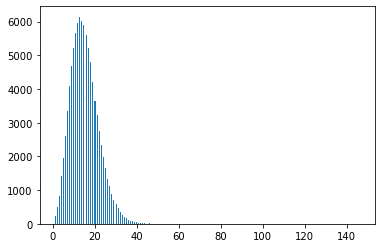

In [35]:
#shows the distribution of the values in crimeDat[CrimeCount]. The distribution bears a close resemblance to the normal distribution.
import matplotlib.pyplot as plt
plt.hist(crimedat['crimecount'], bins=300)

In [36]:
#describes the correlation matrix between the features in crimeDat and the following conclusions can be drawn of it :
#Almost all the features have no correlation with each other. This is good as certain machine learning algorithms are affected adversely by multi-collinearity.
#The feature Hour and crimecount has the greatest positive correlation with the target feature Alarm.
dis = crimedat.corr(method='pearson')
print(dis)

               Month       Day      Hour  District  crimecount     Alarm
Month       1.000000  0.006449 -0.000054  0.000492   -0.001548  0.004971
Day         0.006449  1.000000  0.000052 -0.000160   -0.038555 -0.025444
Hour       -0.000054  0.000052  1.000000  0.000240    0.261254  0.204218
District    0.000492 -0.000160  0.000240  1.000000   -0.292832 -0.253908
crimecount -0.001548 -0.038555  0.261254 -0.292832    1.000000  0.815560
Alarm       0.004971 -0.025444  0.204218 -0.253908    0.815560  1.000000


In [37]:
crimedat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96600 entries, 0 to 138377
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       96600 non-null  int64  
 1   Day         96600 non-null  int64  
 2   Hour        96600 non-null  int64  
 3   District    96600 non-null  int64  
 4   crimecount  96600 non-null  int64  
 5   Alarm       96600 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 7.2 MB


In [38]:
crimedat.head()

,Month,Day,Hour,District,crimecount,Alarm
0,1,1,1,1,21,1.0
1,1,1,1,2,23,1.0
2,1,1,1,3,23,1.0
3,1,1,1,4,33,1.0
4,1,1,1,5,14,0.0


<AxesSubplot:>

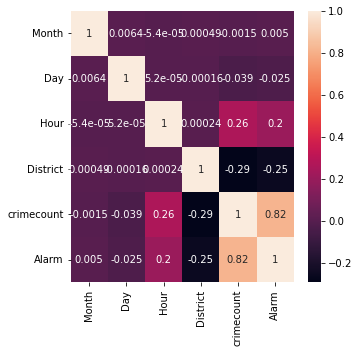

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))

sns.heatmap(dis, annot = True)

In [40]:
cols2 =['Month','Day','District','Hour','crimecount']
print(crimedat[cols2])
y = crimedat['Alarm']

        Month  Day  District  Hour  crimecount
0           1    1         1     1          21
1           1    1         2     1          23
2           1    1         3     1          23
3           1    1         4     1          33
4           1    1         5     1          14
...       ...  ...       ...   ...         ...
138371     12   31        19    12          13
138372     12   31        20    12          10
138374     12   31        22    12           9
138376     12   31        24    12           5
138377     12   31        25    12          18

[96600 rows x 5 columns]


In [41]:
crimedat.head()

,Month,Day,Hour,District,crimecount,Alarm
0,1,1,1,1,21,1.0
1,1,1,1,2,23,1.0
2,1,1,1,3,23,1.0
3,1,1,1,4,33,1.0
4,1,1,1,5,14,0.0


In [42]:
from sklearn.model_selection import train_test_split
 

In [43]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(crimedat[cols2], y, test_size=0.25) # 70% training and 25% test

In [44]:
crimedat.isnull().sum()

Month         0
Day           0
Hour          0
District      0
crimecount    0
Alarm         0
dtype: int64

In [45]:
# Create Decision Tree classifier object
dtree = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
# Train Decision Tree Classifier
dtree.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = dtree.predict(x_test)

In [46]:
#evaluation of model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(" The accuracy obtained using Decision tree classifier is {0:.8f}%".format(100*(dtree.score(x_test, y_test))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12099
         1.0       1.00      1.00      1.00     11827
         2.0       1.00      1.00      1.00       224

    accuracy                           1.00     24150
   macro avg       1.00      1.00      1.00     24150
weighted avg       1.00      1.00      1.00     24150

[[12099     0     0]
 [    0 11826     1]
 [    0     1   223]]
 The accuracy obtained using Decision tree classifier is 99.99171843%


In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro')*100)
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test,y_pred, average='macro')*100)

Accuracy: 99.99171842650102
Precision: 99.84837206633732
Recall: 99.84837206633732
f1 score: 99.84837206633732


[Text(181.71710526315792, 210.192, 'X[3] <= 11.866\ngini = 0.509\nsamples = 72450\nvalue = [36582, 35175, 693]'),
 Text(103.52368421052633, 195.696, 'X[4] <= 8.489\ngini = 0.505\nsamples = 66395\nvalue = [34897, 31037, 461]'),
 Text(97.65, 181.2, 'gini = 0.0\nsamples = 10881\nvalue = [10881, 0, 0]'),
 Text(109.39736842105265, 181.2, 'X[3] <= 7.755\ngini = 0.5\nsamples = 55514\nvalue = [24016, 31037, 461]'),
 Text(66.07894736842105, 166.704, 'X[4] <= 10.385\ngini = 0.502\nsamples = 33909\nvalue = [16956, 16891, 62]'),
 Text(60.20526315789474, 152.208, 'gini = 0.0\nsamples = 5249\nvalue = [5249, 0, 0]'),
 Text(71.95263157894738, 152.208, 'X[3] <= 2.639\ngini = 0.486\nsamples = 28660\nvalue = [11707, 16891, 62]'),
 Text(35.242105263157896, 137.712, 'X[4] <= 25.574\ngini = 0.47\nsamples = 8571\nvalue = [3183, 5370, 18]'),
 Text(17.621052631578948, 123.216, 'X[4] <= 11.134\ngini = 0.475\nsamples = 8212\nvalue = [3183, 5029, 0]'),
 Text(11.747368421052633, 108.72, 'gini = 0.0\nsamples = 748\

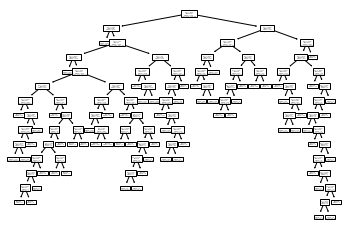

In [48]:
from sklearn import tree
tree.plot_tree(dtree)

In [49]:
x_train1, x_test1, y_train1, y_test1 =train_test_split(crimedat[cols2],y, test_size=0.25,  random_state=0) 

In [50]:
y_test1

63098     0.0
44394     1.0
54375     1.0
39668     0.0
77573     1.0
         ... 
22073     0.0
86043     0.0
56482     0.0
51228     0.0
122063    0.0
Name: Alarm, Length: 24150, dtype: float64

In [51]:
n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train1, y_train1)
y_pred1= neigh.predict(x_test1)
acc= metrics.accuracy_score(y_test1,y_pred1)*100

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1)*100)
print("Precision:",metrics.precision_score(y_test1, y_pred1, average='macro')*100)
print("Recall:",metrics.recall_score(y_test1, y_pred1,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test1,y_pred1, average='macro')*100)

Accuracy: 98.90683229813665
Precision: 97.66452230263708
Recall: 95.36488016643757
f1 score: 96.4695212515005


In [53]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train1, y_train1)
    y_pred1= neigh.predict(x_test1)
    error.append(np.mean(y_pred != y_test1))

Text(0, 0.5, 'Mean Error')

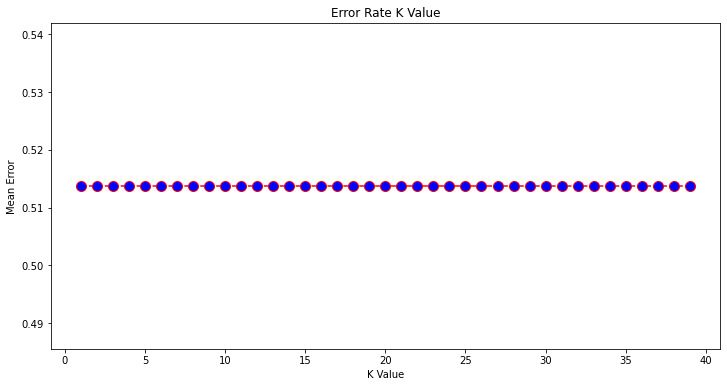

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [55]:
x_train2, x_test2, y_train2, y_test2 =train_test_split(crimedat[cols2],y, test_size=0.33,  random_state=0) 

In [56]:
from sklearn import svm

#Create a svm Classifier
svm1 = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
svm1.fit(x_train2, y_train2)

#Predict the response for test dataset
y_pred2 = svm1.predict(x_test2)

print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2)*100)

Accuracy: 99.94039776648472


In [57]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2)*100)
print("Precision:",metrics.precision_score(y_test2, y_pred2, average='macro')*100)
print("Recall:",metrics.recall_score(y_test2, y_pred2,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test2,y_pred2, average='macro')*100)

Accuracy: 99.94039776648472
Precision: 99.9591424209191
Recall: 98.04526748971193
f1 score: 98.97266944053513


In [58]:
x_train3, x_test3, y_train3, y_test3 =train_test_split(crimedat[cols2],y, test_size=0.25,  random_state=0) 

In [59]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train3,y_train3)

#
y_pred3=logreg.predict(x_test3)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3)*100)
print("Precision:",metrics.precision_score(y_test3, y_pred3, average='macro')*100)
print("Recall:",metrics.recall_score(y_test3, y_pred3,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test3,y_pred3, average='macro')*100)

Accuracy: 98.51345755693582
Precision: 85.03336531615533
Recall: 87.30844343100893
f1 score: 86.10063543320159


In [61]:
x_train4, x_test4, y_train4, y_test4 =train_test_split(crimedat[cols2],y, test_size=0.25,  random_state=0) 

In [62]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train4, y_train4)

#Predict the response for test dataset
y_pred4 = gnb.predict(x_test4)
y_pred4

array([0., 1., 1., ..., 0., 0., 0.])

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4)*100)
print("Precision:",metrics.precision_score(y_test4, y_pred4, average='macro')*100)
print("Recall:",metrics.recall_score(y_test4, y_pred4,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test4,y_pred4, average='macro')*100)

Accuracy: 96.23188405797102
Precision: 88.81930786233914
Recall: 95.57424074792345
f1 score: 91.76431925456737


In [64]:
x_train5, x_test5, y_train5, y_test5 =train_test_split(crimedat[cols2],y, test_size=0.25,  random_state=0) 

In [65]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
ran=RandomForestClassifier(n_estimators=28,criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=False, verbose=0, warm_start=False, class_weight="balanced", ccp_alpha=0.0, max_samples=None)

#Train the model using the training sets y_pred=clf.predict(X_test)
ran.fit(x_train5,y_train5)

y_pred5=ran.predict(x_test5)

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5)*100)
print("Precision:",metrics.precision_score(y_test5, y_pred5, average='macro')*100)
print("Recall:",metrics.recall_score(y_test5, y_pred5,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test5,y_pred5, average='macro')*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
f1 score: 100.0


In [67]:
crimedat['Alarm'].value_counts()

0.0    48681
1.0    47002
2.0      917
Name: Alarm, dtype: int64

In [68]:
x_train6, x_test6, y_train6, y_test6 =train_test_split(crimedat[cols2],y, test_size=0.20,  random_state=0) 

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=1.0)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [70]:
clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=500, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features='sqrt', verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0).fit(x_train6, y_train6)
clf.score(x_test6, y_test6)

1.0

In [71]:
gradient_booster.fit(x_train6,y_train6)
print(classification_report(y_test6,gradient_booster.predict(x_test6)))
y_pred6= gradient_booster.predict(x_test6)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9827
         1.0       1.00      1.00      1.00      9297
         2.0       1.00      1.00      1.00       196

    accuracy                           1.00     19320
   macro avg       1.00      1.00      1.00     19320
weighted avg       1.00      1.00      1.00     19320



In [72]:
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6)*100)
print("Precision:",metrics.precision_score(y_test6, y_pred6, average='macro')*100)
print("Recall:",metrics.recall_score(y_test6, y_pred6,average='macro')*100)
print("f1 score:", metrics.f1_score(y_test6,y_pred6, average='macro')*100)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
f1 score: 100.0
